In [26]:
using QuantumOptics

In [27]:
alpha = 3.
N_small = 10
N_big = 20

b_small = FockBasis(N_small)
b_big = FockBasis(N_big)

psi_small = coherentstate(b_small, alpha)
psi_big = coherentstate(b_big, alpha);

In [28]:
function D(b, α)
  a = full(destroy(b))
  ad = dagger(a)
  return DenseOperator(b, e^(α*ad.data - conj(α)*a.data))
end
psi2_small = D(b_small, alpha)*fockstate(b_small, 0)
psi2_big = D(b_big, alpha)*fockstate(b_big, 0);

In [29]:
println(norm(psi_small))
println(norm(psi_big))
println(norm(psi2_small))
println(norm(psi2_big))

0.8402311112667227
0.9997803499480625
1.0
0.9999999999999993


In [30]:
x = [-5:0.1:5...]
y = [-5:0.1:5...]

Q_small = qfunc(psi_small ⊗ dagger(psi_small), x, y)
Q_big = qfunc(psi_big ⊗ dagger(psi_big), x, y)
Q2_small = qfunc(psi2_small ⊗ dagger(psi2_small), x, y)
Q2_big = qfunc(psi2_big ⊗ dagger(psi2_big), x, y);

In [31]:
using PyPlot

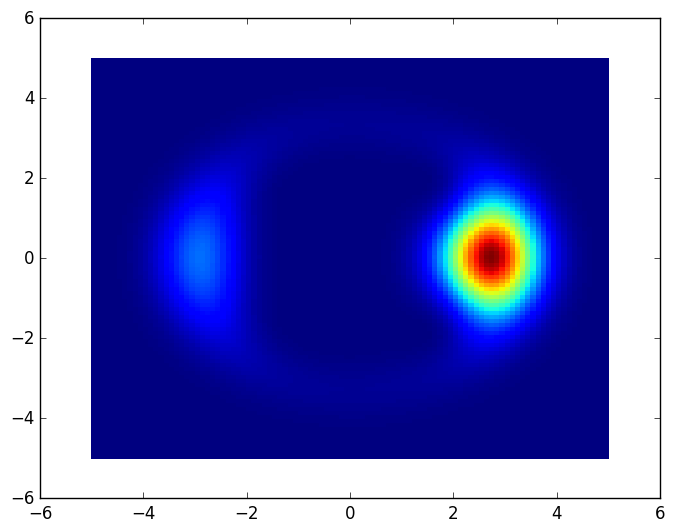

PyObject <matplotlib.collections.PolyCollection object at 0x7fcd869332e8>

In [34]:
# pcolor(x, y, transpose(Q_small))
# figure()
pcolor(x, y, transpose(Q2_small))